In [323]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

#Model ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Project Houses prices Prediction

### Data Info

In [324]:
df=pd.read_csv("/kaggle/input/global-house-purchase-decision-dataset/global_house_purchase_dataset.csv")
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [325]:
for col in df.columns:
  pct_missing= np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


property_id - 0%
country - 0%
city - 0%
property_type - 0%
furnishing_status - 0%
property_size_sqft - 0%
price - 0%
constructed_year - 0%
previous_owners - 0%
rooms - 0%
bathrooms - 0%
garage - 0%
garden - 0%
crime_cases_reported - 0%
legal_cases_on_property - 0%
customer_salary - 0%
loan_amount - 0%
loan_tenure_years - 0%
monthly_expenses - 0%
down_payment - 0%
emi_to_income_ratio - 0%
satisfaction_score - 0%
neighbourhood_rating - 0%
connectivity_score - 0%
decision - 0%


In [326]:
df_China=df[df['country']=='China']
df_China.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
17,18,China,Beijing,Independent House,Unfurnished,3614,1370263,2013,0,4,...,25325,712117,10,4200,658146,0.32,6,3,5,0
18,19,China,Shanghai,Independent House,Unfurnished,5597,2121884,1965,1,5,...,32910,1801788,20,19035,320096,0.41,9,10,5,0
36,37,China,Shenzhen,Studio,Fully-Furnished,883,338311,1983,6,8,...,33255,213100,10,4970,125211,0.07,2,7,10,0
38,39,China,Shanghai,Apartment,Semi-Furnished,5157,1964472,1979,3,4,...,56345,1059369,15,13930,905103,0.16,3,9,3,0
41,42,China,Shenzhen,Farmhouse,Semi-Furnished,2003,759283,1989,0,1,...,58960,332969,30,18435,426314,0.04,6,1,10,0


#### We will remove irrelevant variables and avoid model cheating.

In [327]:
df_China=df_China.drop(columns=['property_id',
                    'city'
                    ,'loan_amount'
                    ,'emi_to_income_ratio'
                    ,'customer_salary'
                    ,'down_payment'
                    ,'monthly_expenses'
                    ,'loan_tenure_years',
                        'legal_cases_on_property',
                        'crime_cases_reported',
                        'decision',
                        'satisfaction_score',
                        'neighbourhood_rating',
                        'connectivity_score',
                        'previous_owners'])

In [328]:
df_China.head()

,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
17,China,Independent House,Unfurnished,3614,1370263,2013,4,4,0,1
18,China,Independent House,Unfurnished,5597,2121884,1965,5,5,1,0
36,China,Studio,Fully-Furnished,883,338311,1983,8,1,0,0
38,China,Apartment,Semi-Furnished,5157,1964472,1979,4,1,0,0
41,China,Farmhouse,Semi-Furnished,2003,759283,1989,1,1,0,0


In [329]:
df_China.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15536 entries, 17 to 199996
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             15536 non-null  object
 1   property_type       15536 non-null  object
 2   furnishing_status   15536 non-null  object
 3   property_size_sqft  15536 non-null  int64 
 4   price               15536 non-null  int64 
 5   constructed_year    15536 non-null  int64 
 6   rooms               15536 non-null  int64 
 7   bathrooms           15536 non-null  int64 
 8   garage              15536 non-null  int64 
 9   garden              15536 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.3+ MB


In [330]:
df_China.describe()

,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden
count,15536.000000,1.553600e+04,15536.000000,15536.000000,15536.000000,15536.000000,15536.000000
mean,3207.994851,1.219038e+06,1991.832711,4.518988,2.758689,0.500257,0.500451
std,1611.139129,6.122561e+05,18.457896,2.298016,1.841102,0.500016,0.500016
min,400.000000,1.493360e+05,1960.000000,1.000000,1.000000,0.000000,0.000000
25%,1814.750000,6.900012e+05,1976.000000,3.000000,1.000000,0.000000,0.000000
50%,3201.000000,1.216632e+06,1992.000000,4.000000,2.000000,1.000000,1.000000
75%,4604.250000,1.749958e+06,2008.000000,7.000000,4.000000,1.000000,1.000000
max,6000.000000,2.282320e+06,2023.000000,8.000000,8.000000,1.000000,1.000000


In [331]:
df_China.shape

(15536, 10)

In [332]:
df_China.value_counts()

country  property_type      furnishing_status  property_size_sqft  price    constructed_year  rooms  bathrooms  garage  garden
China    Apartment          Fully-Furnished    401                 156523   1985              2      2          1       0         1
         Townhouse          Fully-Furnished    736                 277605   1990              6      3          0       0         1
                                               482                 182209   1993              2      1          0       1         1
                                               503                 190373   1978              5      1          1       1         1
                                               533                 205981   1992              1      1          1       1         1
                                                                                                                                 ..
         Independent House  Fully-Furnished    474                 184308   1986 

                    property_size_sqft     price  constructed_year     rooms  \
property_size_sqft            1.000000  0.999989         -0.004235  0.015718   
price                         0.999989  1.000000         -0.004273  0.015768   
constructed_year             -0.004235 -0.004273          1.000000 -0.010865   
rooms                         0.015718  0.015768         -0.010865  1.000000   
bathrooms                     0.017157  0.017178          0.004228  0.625403   
garage                       -0.000678 -0.000602          0.006034  0.007755   
garden                       -0.001168 -0.001186         -0.004361  0.004474   

                    bathrooms    garage    garden  
property_size_sqft   0.017157 -0.000678 -0.001168  
price                0.017178 -0.000602 -0.001186  
constructed_year     0.004228  0.006034 -0.004361  
rooms                0.625403  0.007755  0.004474  
bathrooms            1.000000  0.009752  0.001062  
garage               0.009752  1.000000  0.0119

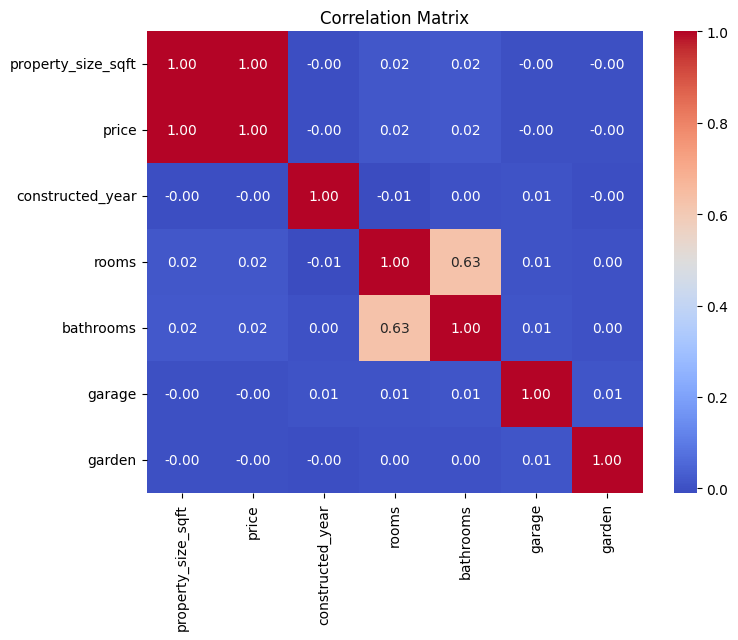

In [333]:
correlation_matrix = df_China.drop(columns=['country', 'property_type', 'furnishing_status']).corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Mechine Learning

In [334]:
df_China=pd.get_dummies(df_China, columns=['property_type', 'furnishing_status'])
df_China.head()

,country,property_size_sqft,price,constructed_year,rooms,bathrooms,garage,garden,property_type_Apartment,property_type_Farmhouse,property_type_Independent House,property_type_Studio,property_type_Townhouse,property_type_Villa,furnishing_status_Fully-Furnished,furnishing_status_Semi-Furnished,furnishing_status_Unfurnished
17,China,3614,1370263,2013,4,4,0,1,False,False,True,False,False,False,False,False,True
18,China,5597,2121884,1965,5,5,1,0,False,False,True,False,False,False,False,False,True
36,China,883,338311,1983,8,1,0,0,False,False,False,True,False,False,True,False,False
38,China,5157,1964472,1979,4,1,0,0,True,False,False,False,False,False,False,True,False
41,China,2003,759283,1989,1,1,0,0,False,True,False,False,False,False,False,True,False


In [335]:
df_China.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15536 entries, 17 to 199996
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   country                            15536 non-null  object
 1   property_size_sqft                 15536 non-null  int64 
 2   price                              15536 non-null  int64 
 3   constructed_year                   15536 non-null  int64 
 4   rooms                              15536 non-null  int64 
 5   bathrooms                          15536 non-null  int64 
 6   garage                             15536 non-null  int64 
 7   garden                             15536 non-null  int64 
 8   property_type_Apartment            15536 non-null  bool  
 9   property_type_Farmhouse            15536 non-null  bool  
 10  property_type_Independent House    15536 non-null  bool  
 11  property_type_Studio               15536 non-null  bool  
 12  propert

In [336]:
X=df_China.drop(['price', 'country'], axis=1)
y=df_China['price']

In [337]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Linear Regresion Model and Visualitation

In [338]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)
print("Linier Regresion  R² : ", r2_score(y_test, y_pred_lr))
print("Linier Regresion RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linier Regresion  R² :  0.9999784190947079
Linier Regresion RMSE :  2849.2535896028508


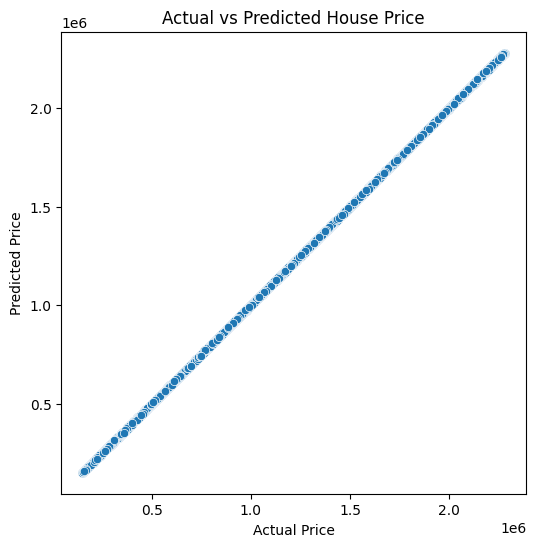

In [339]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=lr.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Decision Tree Model and Visualitation

In [340]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print("Decision Tree  R² : ", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree  R² :  0.9999539635409792
Decision Tree RMSE :  4161.474430324134


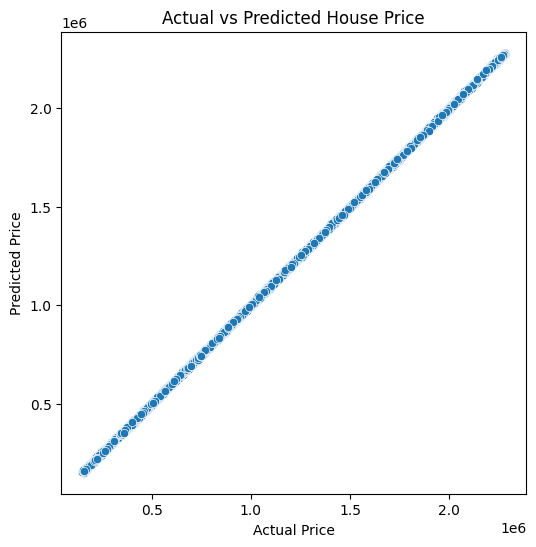

In [341]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=dt.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Random Forest Model and Visualitation

In [342]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print("Random Forest  R² : ", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Random Forest  R² :  0.999973089313203
Random Forest RMSE :  4161.474430324134


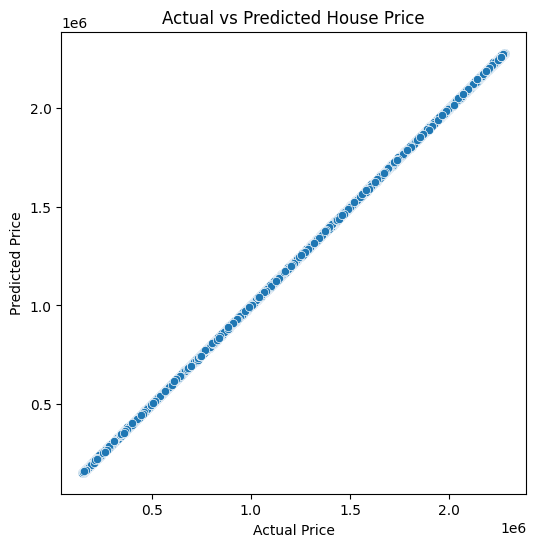

In [343]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=rf.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Gradient Boost Model and Visualization

In [344]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
print("Gradient Boost  R² : ", r2_score(y_test, y_pred_gb))
print("Gradient Boost RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

Gradient Boost  R² :  0.9999288511826893
Gradient Boost RMSE :  4161.474430324134


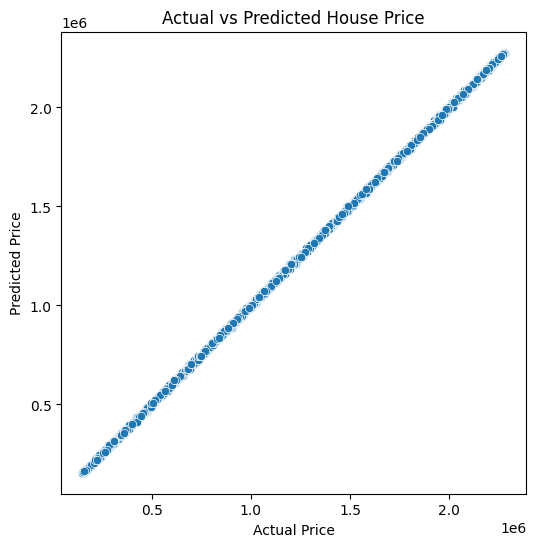

In [345]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=gb.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Result : $R^2$ and $RMSE$

In [346]:
result=pd.DataFrame({'metode':['lr', 'dt', 'rf', 'gb'],
       'R²':[ r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf),
            r2_score(y_test, y_pred_gb)],
       'RMSE':[np.sqrt(mean_squared_error(y_test, y_pred_lr)),
               np.sqrt(mean_squared_error(y_test, y_pred_dt)),
              np.sqrt(mean_squared_error(y_test, y_pred_rf)),
              np.sqrt(mean_squared_error(y_test, y_pred_gb))]})


In [347]:
result

,metode,R²,RMSE
0,lr,0.999978,2849.253590
1,dt,0.999954,4161.474430
2,rf,0.999973,3181.695879
3,gb,0.999929,5173.448347
